# Imports

In [25]:
import matplotlib.pyplot as plt
import numpy as np 
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.datasets import boston_housing
from sklearn.preprocessing import StandardScaler
import warnings 
warnings.filterwarnings('ignore')

# First model

In [23]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

In [13]:
y_train

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [7]:
X_train.shape

(404, 13)

In [10]:
X_test.shape

(102, 13)

In [26]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])

In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(X_train, y_train, validation_split=0.2, epochs=150, batch_size=32, verbose=1)

Epoch 1/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 34.3704 - mae: 4.1957 - val_loss: 26.5436 - val_mae: 3.7014
Epoch 2/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 25.5939 - mae: 3.5449 - val_loss: 24.7475 - val_mae: 3.5518
Epoch 3/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 23.5292 - mae: 3.4542 - val_loss: 38.9136 - val_mae: 4.6177
Epoch 4/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 29.3293 - mae: 3.7971 - val_loss: 37.1906 - val_mae: 4.5063
Epoch 5/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 27.4709 - mae: 3.7154 - val_loss: 35.4535 - val_mae: 4.3671
Epoch 6/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 24.1825 - mae: 3.4156 - val_loss: 23.5273 - val_mae: 3.4240
Epoch 7/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 23.1747 - mae: 3.3459 - val_loss: 27.0260 - val_mae: 3.8172
Epoch 8/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 30.7691 - mae: 4.1295 - val_loss: 22.8339 - val_mae: 3.3004
Epoch 9/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 27.1279 - mae: 3.6935
MAE sur test : 3.69


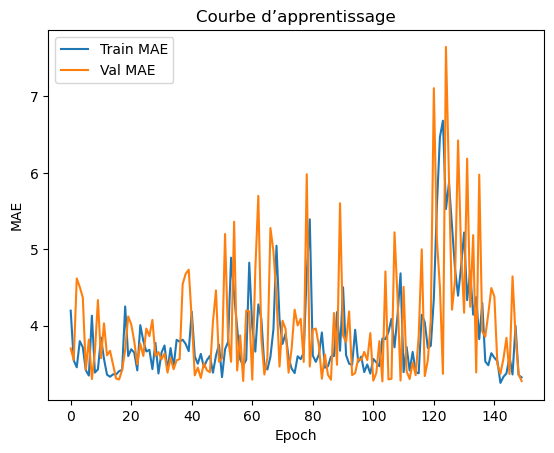

In [ ]:
loss, mae = model.evaluate(X_test, y_test)
print(f"MAE sur test : {mae:.2f}")

plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('Courbe d’apprentissage')
plt.show()

# CNN